# Prediction Using Decison Tree algorithm LGMVIP 

# DONE BY - SRIKANTA MAHARA 

# Importing the important libraries 

In [47]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier                  # import all the libraries tht are needed 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import datasets 


# Loading of Dataset 

In [3]:
irisdata = pd.read_csv("C:\\Users\\A\\Downloads\\IRIS.csv")

# Checking First 15 Data 

In [6]:
irisdata.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Getting Information about the dataset 

In [7]:
irisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [72]:
# Check if null values are present in the dataset
irisdata.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [9]:
irisdata['species'].value_counts()  # counting each number of species 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [12]:
X = irisdata[['sepal_length','sepal_width','petal_length','petal_width']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

# Checking Descriptive Statistics 

In [13]:
irisdata.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
iris = datasets.load_iris()
#df = pd.DataFrame(data.data, columns=data.feature_names)
#df.head()
irisdata = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
irisdata.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [42]:
irisdata["target"].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [22]:
Y = irisdata['species']
Y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [23]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, Y_trainset, Y_testset = train_test_splittrain_X, test_X, train_y, test_y= train_test_split(X,Y, test_size=0.3, random_state=0)

In [24]:
speciesTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
speciesTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [25]:
speciesTree.fit(X_trainset, Y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [26]:
predTree = speciesTree.predict(X_testset)

In [27]:
print(predTree [0:5])
print(Y_testset[0:5])

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']
114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
Name: species, dtype: object


# Decision Tree Accuracy Checking 

In [28]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ",metrics.accuracy_score(Y_testset, predTree))

DecisionTrees's Accuracy:  0.9777777777777777


# Visualizing Decision Tree

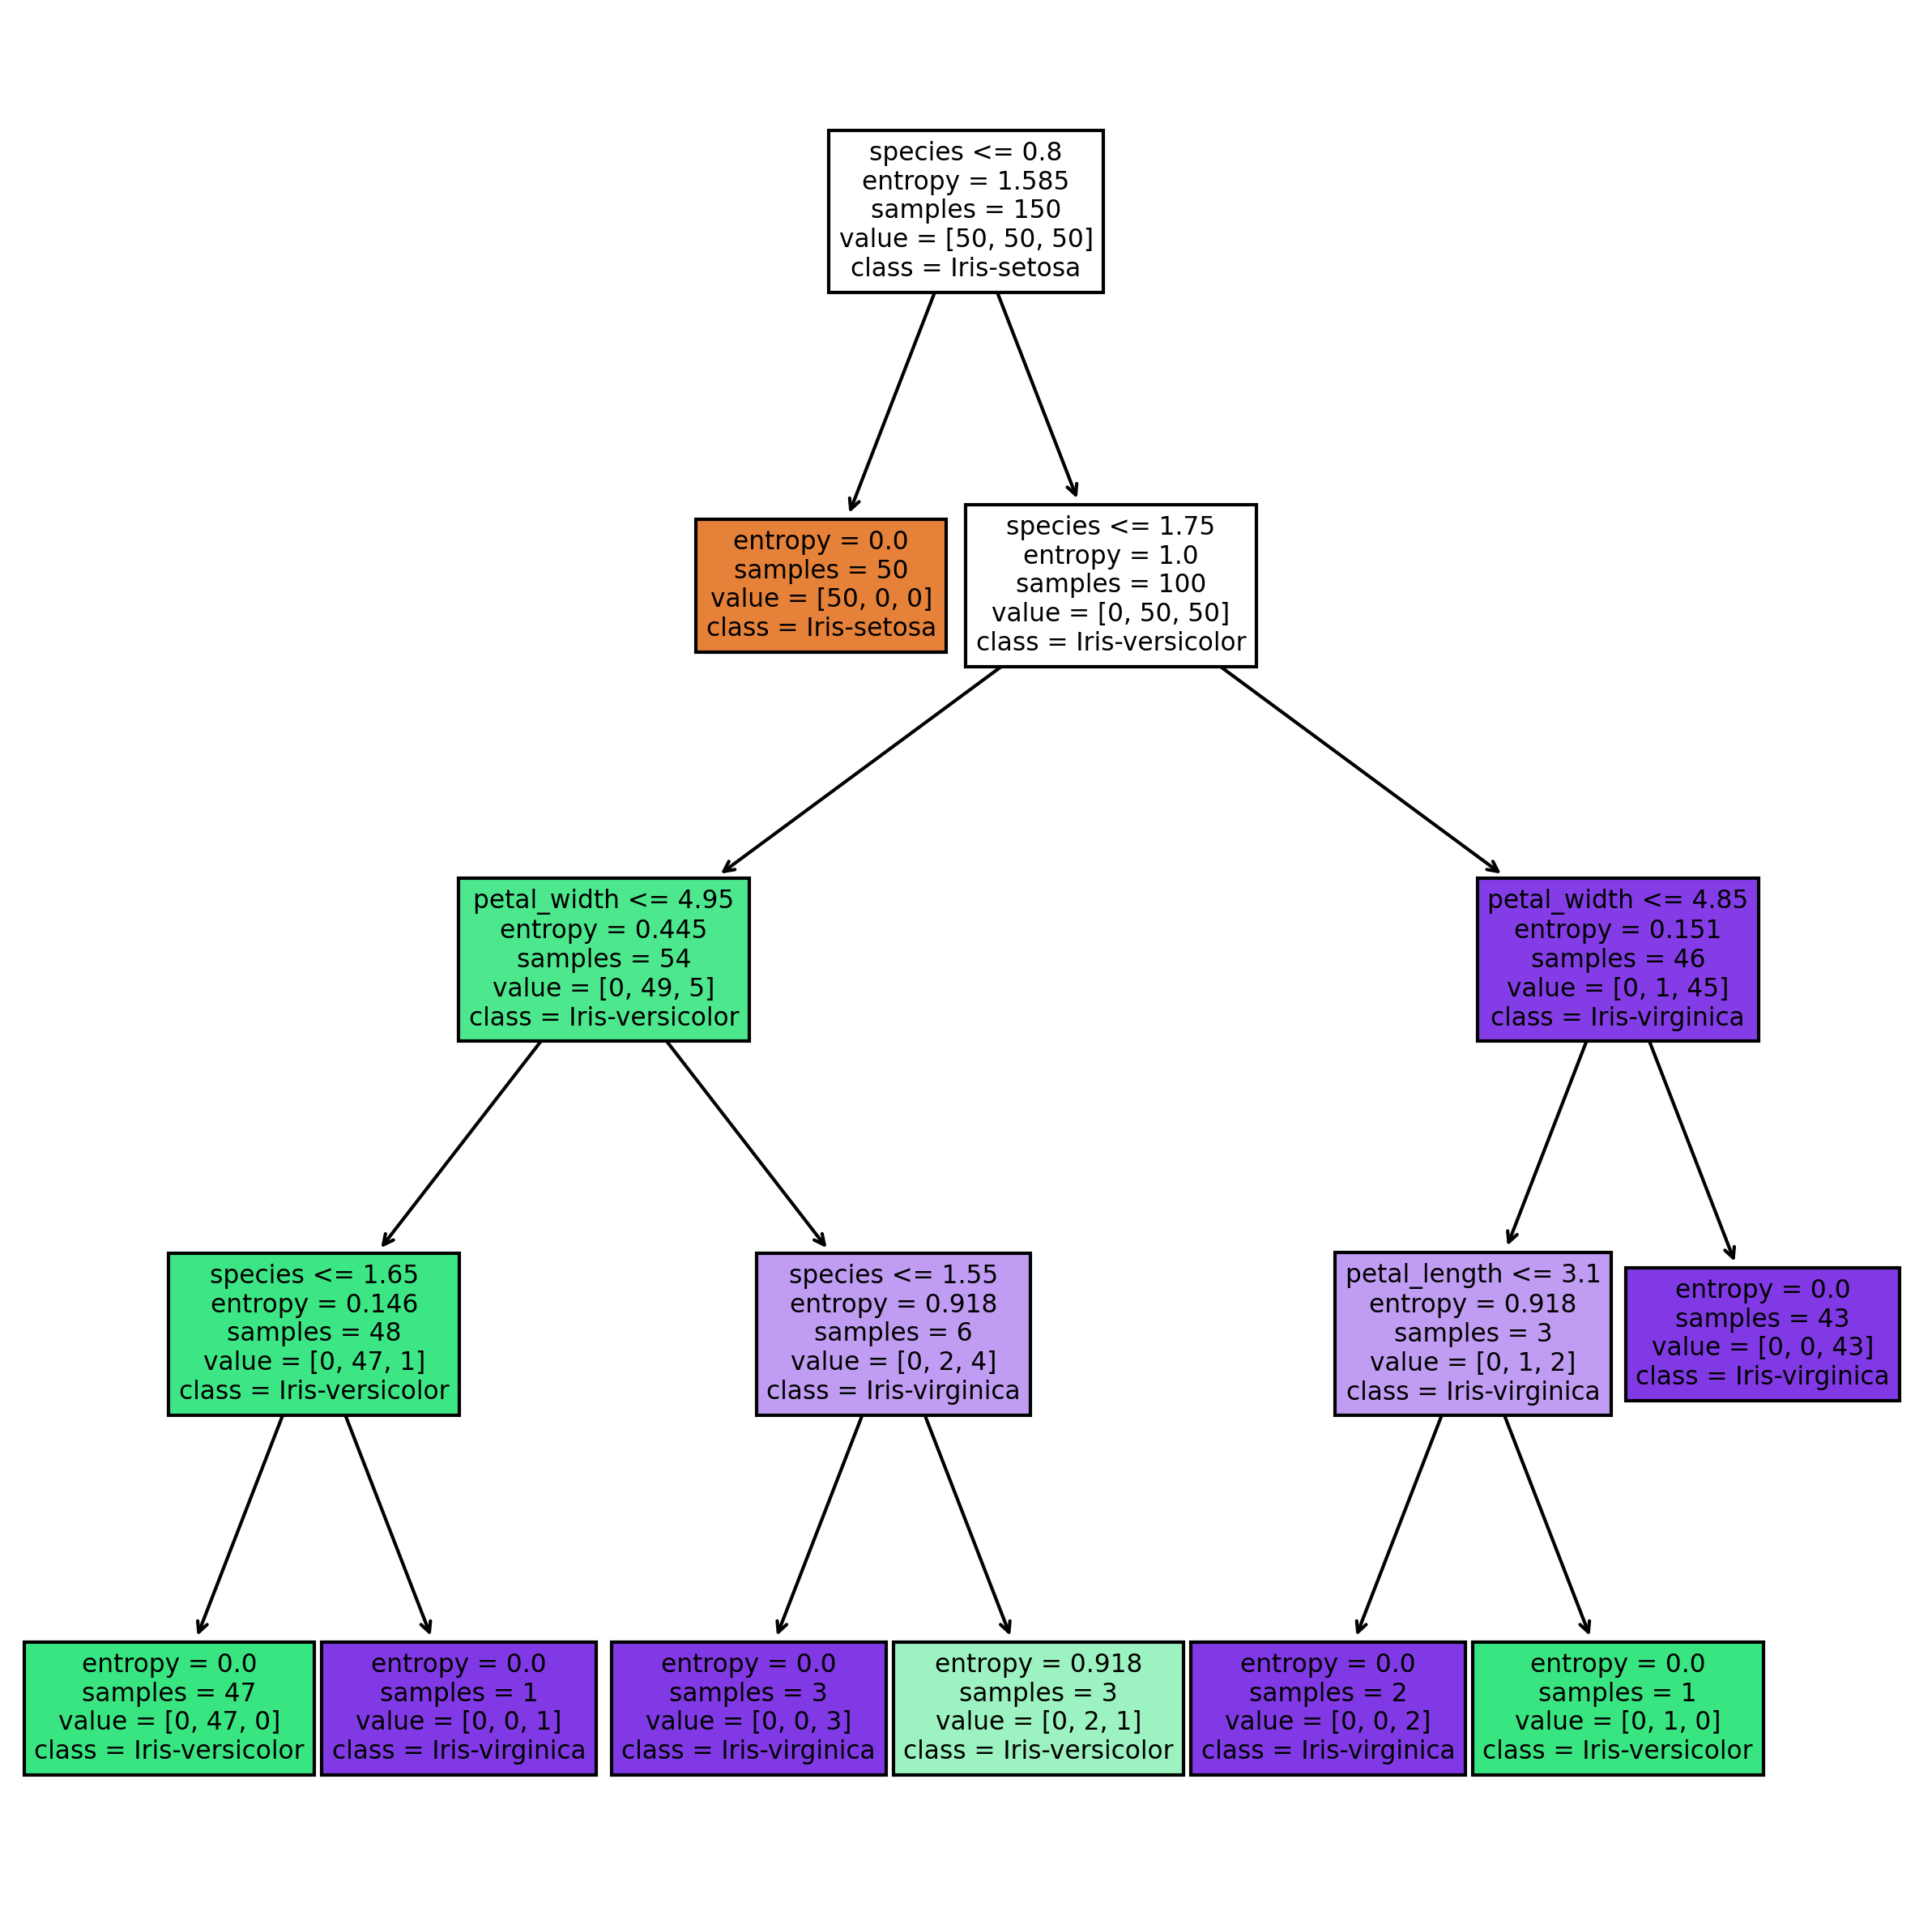

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
fn = irisdata.columns[1:5]
cn = irisdata["species"].unique().tolist()
speciesTree.fit(X, Y)
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,10), dpi = 300)

tree.plot_tree(speciesTree,feature_names = fn, class_names = cn, filled = True);

In [32]:
X_new = [[6.3,3.0,1.3,0.2]]

In [34]:
predTree = speciesTree.predict(X_new)

In [35]:
predTree

array(['Iris-setosa'], dtype=object)

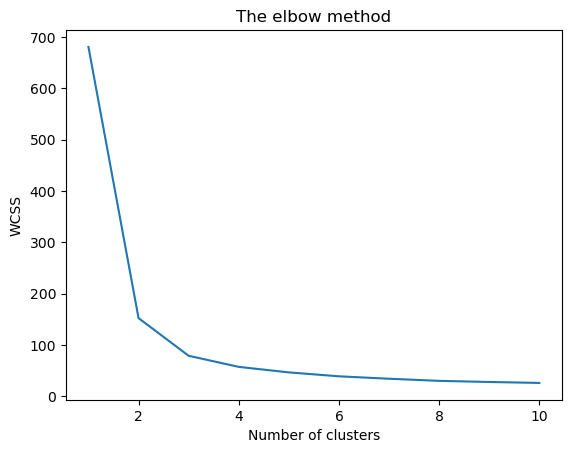

In [39]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [52]:
# Create a model using Decision Tree Classifier 
model = DecisionTreeClassifier(criterion="entropy",max_depth=3)

# Train the model using data
model.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [53]:
# Display performance score of the model
model.score(X,Y)

0.9733333333333334

In [54]:
expected = Y

# Store predicted target values
predicted = model.predict(X)

In [55]:
print(metrics.classification_report(expected, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.94      0.96        50
 Iris-virginica       0.94      0.98      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



# Confusion Matrix

In [56]:
# Display confusion matrix
print(metrics.confusion_matrix(expected, predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


# Showing Heatmap

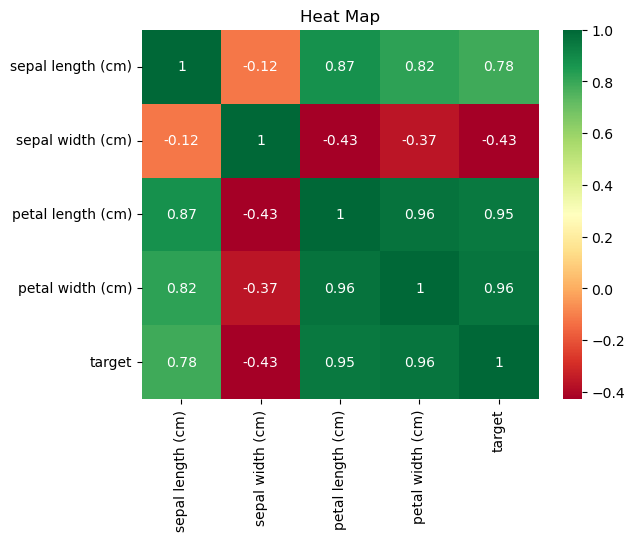

In [73]:
sns.heatmap(irisdata.corr(),annot = True,cmap='RdYlGn')
plt.title("Heat Map")
plt.show()